## Our Code

In [8]:
import numpy as np
# Define the maze
maze = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1]
]
source = (2,8)
destination = (13,8)

# Define the maze
maze = np.array([
    [1, 1, 0, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 0]
])
source = (1,3)
destination = (4,3)
facing = "left"

# Obstacle Avoidance
maze = np.array([
    [1, 1, 1, 1],
    [1, 1, 0, 1],
    [1, 0, 0, 1],
    [1, 0, 1, 1],
    [1, 0, 1, 1],
    [1, 0, 0, 1],
    [1, 1, 0, 0],
    [1, 1, 1, 1]
])
source = (1,2)
destination = (5,3)
facing = "down"

In [2]:
def binary_to_decimal(binary):
    decimal = int(binary, 2)
    return decimal

# Example usage:
binary_number = "101"
decimal_value = binary_to_decimal(binary_number)
print("Binary:", binary_number)
print("Decimal:", decimal_value)


Binary: 101
Decimal: 5


In [3]:
def get_current_state(maze, current_location, facing):
    row, col = current_location
    # Calculate the next location based on the facing direction
    if facing == 'up':
        front_row, front_col = row - 1, col
        left_row, left_col = row, col - 1
        right_row, right_col = row, col + 1
        # Check if there is a path to the left
        left_value = 0 if left_col > 0 and maze[left_row][left_col] == 0 else 1
        # Check if there is a path to the right
        right_value = 0 if right_col < len(maze[0]) and maze[right_row][right_col] == 0 else 1
        # Check if there is a path to the front
        front_value = 0 if front_row > 0 and maze[front_row][front_col] == 0 else 1
        # Check if there is an obstacle in front
    elif facing == 'down':
        front_row, front_col = row + 1, col
        left_row, left_col = row, col + 1
        right_row, right_col = row, col - 1
        # Check if there is a path to the left
        left_value = 0 if left_col < len(maze[0]) and maze[left_row][left_col] == 0 else 1
        # Check if there is a path to the right
        right_value = 0 if right_col > 0 and maze[right_row][right_col] == 0 else 1
        # Check if there is a path to the front
        front_value = 0 if front_row < len(maze) and maze[front_row][front_col] == 0 else 1
    elif facing == 'left':
        front_row, front_col = row, col - 1
        left_row, left_col = row + 1, col
        right_row, right_col = row - 1, col
        # Check if there is a path to the left
        left_value = 0 if left_row < len(maze) and maze[left_row][left_col] == 0 else 1
        # Check if there is a path to the right
        right_value = 0 if right_row > 0 and maze[right_row][right_col] == 0 else 1
        # Check if there is a path to the front
        front_value = 0 if front_col > 0 and maze[front_row][front_col] == 0 else 1
    elif facing == 'right':
        front_row, front_col = row, col + 1
        left_row, left_col = row - 1, col
        right_row, right_col = row + 1, col
        # Check if there is a path to the left
        left_value = 0 if left_row >0 and maze[left_row][left_col] == 0 else 1
        # Check if there is a path to the right
        right_value = 0 if right_row <  len(maze) and maze[right_row][right_col] == 0 else 1
        # Check if there is a path to the front
        front_value = 0 if front_col <  len(maze[0]) and maze[front_row][front_col] == 0 else 1
    return (left_value, right_value, front_value), binary_to_decimal(str(left_value) + str(right_value) + str(front_value))

# Example usage:
# current_location = (2, 8)  # Example starting location
current_location = (1, 3)  # Example starting location
# facing_direction = 'up'    # Example starting facing direction
get_current_state(maze, current_location, facing='up') # output: [0, 1, 1]<binary>, 3 <decimal>
get_current_state(maze, current_location, facing='left') # output: [0, 1, 1]<binary>, 6 <decimal>
get_current_state(maze, current_location, facing='right') # output: [1, 1, 1]<binary>, 7 <decimal>
get_current_state(maze, current_location, facing='down') # output: [1, 0, 1] <binary> 5 <decimal>


((1, 0, 1), 5)

In [4]:
def is_valid_coords(maze, coordinates):
    x, y = coordinates
    if (x>=0) and (x < len(maze)) and (y > 0) and (y < len(maze[0])) and maze[x][y]==0:
        return True
    else:
        return False

def move(maze, facing, action, current_coordinates, move_forward_on_turn=True):
    '''
      move_forward_on_turn=True makes it move forward towards direction of turn on every turn action.
    '''
    x, y = current_coordinates
    new_facing = facing
    new_coordinates = current_coordinates

    # Perform the chosen action
    if action == 0:
      action = "left"
    elif action == 1:
      action = "right"
    elif action == 2:
      action = "forward"
    elif action not in ["left", "right", "forward"]:
      raise ValueError(f"Amigo! action is not supposed to be \"{action}\". it is either of [left, right, forward]")  # Raises a ValueError

    if action == 'left':
        if facing == 'up':
            new_facing = 'left'
        elif facing == 'down':
            new_facing = 'right'
        elif facing == 'left':
            new_facing = 'down'
        elif facing == 'right':
            new_facing = 'up'
        # new_coordinates = current_coordinates
    elif action == 'right':
        if facing == 'up':
            new_facing = 'right'
        elif facing == 'down':
            new_facing = 'left'
        elif facing == 'left':
            new_facing = 'up'
        elif facing == 'right':
            new_facing = 'down'
        # new_coordinates = current_coordinates
    if move_forward_on_turn:
        facing = new_facing
    if action == "forward" or move_forward_on_turn:
        if facing == 'up':
            new_coordinates = (x - 1, y)
        elif facing == 'down':
            new_coordinates = (x + 1, y)
        elif facing == 'left':
            new_coordinates = (x, y - 1)
        elif facing == 'right':
            new_coordinates = (x, y + 1)
        if not is_valid_coords(maze, new_coordinates):
            new_coordinates = current_coordinates
        # new_facing = facing
    return new_coordinates, new_facing

# Example usage:
current_facing = 'up'      # Example current facing action
action = 'left'  # Example rotation action ('left' or 'right')

current_coordinates = (0, 0)  # Example starting coordinates
new_coordinates, new_facing = move(maze, current_facing, action, current_coordinates)

print("New Coordinates:", new_coordinates)
print("New Facing Direction:", new_facing)

New Coordinates: (0, 0)
New Facing Direction: left


In [5]:
from IPython.display import clear_output
def display(maze, source, destination, current_position, path=None):
    clear_output()
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if (i, j) == source:
                print('S', end=' ')
            elif (i, j) == destination:
                print('D', end=' ')
            elif (i, j) == current_position:
                print('C', end=' ')
            elif path and (i, j) in path:
                print('*', end=' ')  # Mark the path with '*'
            elif maze[i][j] == 1:
                print('#', end=' ')
            else:
                print('.', end=' ')
        print()


## Training Q-network

In [6]:
import numpy as np

# Define Q-learning parameters
num_actions = 4  # Up, Down, Left, Right
learning_rate = 0.1
discount_factor = 0.9
exploration_rate = 0.1
exploration_rate_decay = .85
num_episodes = 1000

# Define the number of states and actions
num_states = 2 ** 3  # 3 binary inputs
num_actions = 3      # left, right, forward
iteration_path_len_data = []


# Initialize Q-table with random values
q_values = np.zeros((num_states, num_actions))

for episode in range(num_episodes):
    # state = (0, 0)  # Starting position
    current_coordinates = source
    facing = "left" # For maze 2
    facing = "down" # For maze 3
    state_binary, state = get_current_state(maze, current_coordinates, facing)
    path = [current_coordinates]

    # while state != (maze.shape[0] - 1, maze.shape[1] - 1):  # Continue until reaching the goal
    while current_coordinates != destination:
        # Choose an action using epsilon-greedy strategy
        if np.random.rand() < exploration_rate:
            action = np.random.choice(num_actions)   # action is one of [0, 1, 2]
        else:
            action = np.argmax(q_values[state])      # action is one of [0, 1, 2]
        new_coordinates, new_facing = move(maze, facing, action, current_coordinates)
        new_state_binary, new_state = get_current_state(maze, new_coordinates, new_facing)


        # Update Q-value using the Bellman equation
        reward = -1 if maze[new_coordinates[0], new_coordinates[1]] == 0 else -5  # Penalize hitting a wall
        reward = +2 if new_coordinates == destination else reward # Reward for reaching destination
        q_values[state, action] += learning_rate * (
                reward + discount_factor * np.max(q_values[new_state]) - q_values[state, action])

        # Move to the new state
        facing = new_facing
        current_coordinates = new_coordinates
        state = new_state
        path.append(current_coordinates)
    iteration_path_len_data.append([episode, len(path)])

    # Decrease the exploration rate
    exploration_rate *= exploration_rate_decay
    if episode % 100 == 0:
        display(maze=maze, path=path, source = source, destination= (maze.shape[0] - 1, maze.shape[1] - 1), current_position=(maze.shape[0] - 1, maze.shape[1] - 1))
        print(f'{episode} path: len.{len(path)} {path}')

print("Training complete!")
# visualize_path(path)
display(maze=maze, path=path, source = source, destination= (maze.shape[0] - 1, maze.shape[1] - 1), current_position=(maze.shape[0] - 1, maze.shape[1] - 1))
print(f'path: len.{len(path)} {path}')

# # # # 
# # S # 
# * * # 
# * # # 
# * * # 
# # * * 
# # # D 
path: len.8 [(1, 2), (2, 2), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2), (5, 3)]


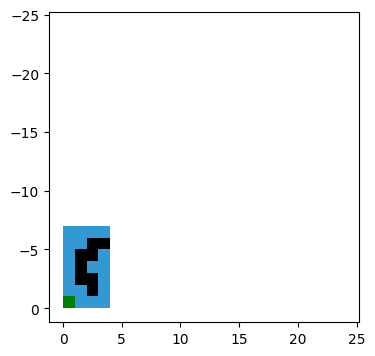

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output, display

def render(maze, snake, food):
    maze_height = len(maze)
    maze_width = len(maze[0])
    # fig_width = 8 * maze_width / maze_height
    # fig, ax = plt.subplots(figsize=(fig_width, 8))
    # fig, ax = plt.subplots(figsize=(8, 8))
    rect_size = min(8 / maze_width, 8 / maze_height)
    fig, ax = plt.subplots(figsize=(maze_width * rect_size, maze_height * rect_size))

    # Plot the maze
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] == '1' or maze[i][j] == 1:
                ax.add_patch(patches.Rectangle((j, -i - 1), 1, 1, facecolor=(50/255, 153/255, 213/255)))
            # elif maze[i][j] == 'S':
            #     ax.add_patch(patches.Rectangle((j, -i - 1), 1, 1, facecolor='black'))  # snake_head
            # elif maze[i][j] == 'D':
            #     ax.add_patch(patches.Rectangle((j, -i - 1), 1, 1, facecolor='green')) # food
            elif maze[i][j] == '0' or maze[i][j] == 0:
                ax.add_patch(patches.Rectangle((j, -i - 1), 1, 1, facecolor='black')) # background

    # Plot the snake
    for segment in snake:
        ax.add_patch(patches.Rectangle((segment[1], -segment[0] - 1), 1, 1, facecolor='white')) # snake_body

    # Plot the food
    ax.add_patch(patches.Rectangle((food[1], -food[0] - 1), 1, 1, facecolor='green'))


    plt.axis('scaled')
    plt.gca().invert_yaxis()  # Invert y-axis to match the matrix coordinates

    # Clear the previous output and display the updated plot
    clear_output(wait=True)
    display(fig)
    plt.close(fig)
    plt.show()

food = (0,0)
snake = [(24, 24)]
# Example usage
render(maze, snake, food)

print('sleeping...')
import time
time.sleep(3)
snake = [(23,23)]
render(maze, snake, food)


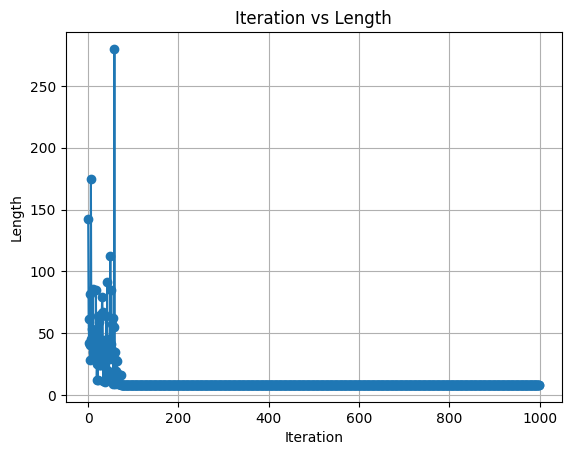

In [ ]:
import matplotlib.pyplot as plt

# Your data in the format: [ [iteration-1, length-1], [iteration-2, length-2], ... ]
# data = [[1, 10], [2, 15], [3, 20], [4, 25]]
data = iteration_path_len_data

# Extracting iterations and lengths into separate lists
iterations, lengths = zip(*data)

# Plotting the data
plt.plot(iterations, lengths, marker='o', linestyle='-')
plt.title('Iteration vs Length')
plt.xlabel('Iteration')
plt.ylabel('Length')
plt.grid(True)
plt.show()

# Save the plot as a JPEG file
plt.savefig('iteration_vs_length_plot.jpg')

# Using Trained Q-Network

In [ ]:
source  = source
destination  = destination

current_coordinates = source
facing = "left" # For maze 2
facing = "down" # For maze 3
state_binary, state = get_current_state(maze, current_coordinates, facing)
path = [current_coordinates]

# while state != (maze.shape[0] - 1, maze.shape[1] - 1):  # Continue until reaching the goal
while current_coordinates != destination:
    # Choose an action using epsilon-greedy strategy
    # if np.random.rand() < exploration_rate:
    #     action = np.random.choice(num_actions)
    # else:
    action = np.argmax(q_values[state])

    new_coordinates, new_facing = move(maze, facing, action, current_coordinates)
    new_state_binary, new_state = get_current_state(maze, new_coordinates, new_facing)

    # Update Q-value using the Bellman equation
    # reward = -1 if maze[new_coordinates[0], new_coordinates[1]] == 0 else -5  # Penalize hitting a wall
    # reward = +5 if new_coordinates == destination else reward # Reward for reaching destination
    # q_values[state, action] += learning_rate * (
    #         reward + discount_factor * np.max(q_values[new_state]) - q_values[state, action])

    # Move to the new state
    facing = new_facing
    current_coordinates = new_coordinates
    state = new_state
    path.append(current_coordinates)
    # print(len(path))
    display(maze=maze, path=path, source = source, destination= (maze.shape[0] - 1, maze.shape[1] - 1), current_position=(maze.shape[0] - 1, maze.shape[1] - 1))

# Decrease the exploration rate
exploration_rate *= exploration_rate_decay
if episode % 100 == 0:
    display(maze=maze, path=path, source = (0,0), destination= (maze.shape[0] - 1, maze.shape[1] - 1), current_position=(maze.shape[0] - 1, maze.shape[1] - 1))

print("Training complete!")
# visualize_path(path)
display(maze=maze, path=path, source = source, destination= (maze.shape[0] - 1, maze.shape[1] - 1), current_position=(maze.shape[0] - 1, maze.shape[1] - 1))
print(f'path: len.{len(path)} {path}')

# # # # 
# # S # 
# * * # 
# * # # 
# * * # 
# # * * 
# # # D 
path: len.8 [(1, 2), (2, 2), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2), (5, 3)]


## Maze-2 Q-values

In [ ]:
# Maze-2 Q-Values
q_values
'''
# Maze-2
array([[-0.14567543,  0.02899212, -0.26580594],
       [15.50059371, -0.15679   , -0.57513834],
       [-0.5       , -0.76106002, 19.25654426],
       [16.33088984, -2.59484078, -2.47422423],
       [-0.85218008, -0.70064572, 12.95053434],
       [-2.28421257, -2.77678508, -2.6859972 ],
       [-1.61504568, -1.84850008, 12.09657983],
       [-2.71166051, -3.13316787, -3.18291114]])
'''

'''
# Maze-3
'''

'\n# Maze-3\n'

## Flatten Q-Table

In [ ]:
# Flatten the Q-table for copying to Arduino code
flattened_q_values = q_values.flatten()

# Print the flattened Q-table
print("Flattened Q-table:")
print(list(flattened_q_values))

'''
Flattened Q-table (Maze-2):
[-0.14567542786524684, 0.028992119894766844, -0.2658059392757915, 15.500593710459835, -0.15679, -0.5751383360655641, -0.5, -0.7610600150158306, 19.256544264254092, 16.330889837828664, -2.594840781380889, -2.474224227054556, -0.852180077055561, -0.7006457235470309, 12.950534339413846, -2.2842125693118476, -2.776785077874974, -2.6859971955040907, -1.6150456834794744, -1.8485000844551536, 12.096579828480882, -2.7116605133971876, -3.133167873327339, -3.182911142097555]

Flattened Q-table (Maze-3): obstacle avoidance
[0.0, 0.0, 0.0, -8.038707105143146, -8.082612249219368, -8.075357976574818, 0.0, 0.0, 0.0, -6.647911287348904, -8.350614717222712, -8.359131172256962, 0.0, 0.0, 0.0, -8.401727003925874, -7.051792274204917, -8.407046054870735, -8.05865436530638, -8.055914330703747, -7.195154863191697, -8.159045656801942, -8.353843068419978, -8.358464332980923]
'''

Flattened Q-table:
[0.0, 0.0, 0.0, -8.038707105143146, -8.082612249219368, -8.075357976574818, 0.0, 0.0, 0.0, -6.647911287348904, -8.350614717222712, -8.359131172256962, 0.0, 0.0, 0.0, -8.401727003925874, -7.051792274204917, -8.407046054870735, -8.05865436530638, -8.055914330703747, -7.195154863191697, -8.159045656801942, -8.353843068419978, -8.358464332980923]


'\nFlattened Q-table (Maze-2):\n[-0.14567542786524684, 0.028992119894766844, -0.2658059392757915, 15.500593710459835, -0.15679, -0.5751383360655641, -0.5, -0.7610600150158306, 19.256544264254092, 16.330889837828664, -2.594840781380889, -2.474224227054556, -0.852180077055561, -0.7006457235470309, 12.950534339413846, -2.2842125693118476, -2.776785077874974, -2.6859971955040907, -1.6150456834794744, -1.8485000844551536, 12.096579828480882, -2.7116605133971876, -3.133167873327339, -3.182911142097555]\n'

In [ ]:
f=[-0.14567542786524684, 0.028992119894766844, -0.2658059392757915, 15.500593710459835, -0.15679, -0.5751383360655641, -0.5, -0.7610600150158306, 19.256544264254092, 16.330889837828664, -2.594840781380889, -2.474224227054556, -0.852180077055561, -0.7006457235470309, 12.950534339413846, -2.2842125693118476, -2.776785077874974, -2.6859971955040907, -1.6150456834794744, -1.8485000844551536, 12.096579828480882, -2.7116605133971876, -3.133167873327339, -3.182911142097555]
f

[-0.14567542786524684,
 0.028992119894766844,
 -0.2658059392757915,
 15.500593710459835,
 -0.15679,
 -0.5751383360655641,
 -0.5,
 -0.7610600150158306,
 19.256544264254092,
 16.330889837828664,
 -2.594840781380889,
 -2.474224227054556,
 -0.852180077055561,
 -0.7006457235470309,
 12.950534339413846,
 -2.2842125693118476,
 -2.776785077874974,
 -2.6859971955040907,
 -1.6150456834794744,
 -1.8485000844551536,
 12.096579828480882,
 -2.7116605133971876,
 -3.133167873327339,
 -3.182911142097555]

## Experiment: Type-1

In [ ]:
import numpy as np
import tensorflow as tf

# Define the maze
maze = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

# Define the Q-network
class QNetwork(tf.keras.Model):
    def __init__(self, state_size, action_size):
        super(QNetwork, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='relu', input_shape=(state_size,))
        self.dense2 = tf.keras.layers.Dense(32, activation='relu')
        self.output_layer = tf.keras.layers.Dense(action_size, activation='linear')

    def call(self, state):
        x = self.dense1(state)
        x = self.dense2(x)
        return self.output_layer(x)

# Hyperparameters
state_size = 3  # [0, 0, 1]
action_size = 3  # 4 possible actions: left, right, up, down
learning_rate = 0.001
discount_factor = 0.95

# Instantiate the Q-network
model = QNetwork(state_size, action_size)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')

# Q-learning training loop
epochs = 1000
for epoch in range(epochs):
    current_state = [0, 0, 1]  # Start at the top-left corner of the maze
    done = False
    total_reward = 0

    while not done:
        # Choose an action using epsilon-greedy strategy
        epsilon = 0.1
        if np.random.rand() < epsilon:
            action = np.random.randint(action_size)
        else:
            q_values = model.predict(np.array([current_state]))
            action = np.argmax(q_values)

        # Take the chosen action and observe the next state and reward
        next_state = np.copy(current_state)
        if action == 0:  # Move left
            next_state[0] = max(0, current_state[0] - 1)
        elif action == 1:  # Move right
            next_state[1] = min(1, current_state[1] + 1)
        elif action == 2:  # Move up
            next_state[2] = max(0, current_state[2] - 1)
        elif action == 3:  # Move down
            next_state[2] = min(1, current_state[2] + 1)

        reward = -1 if maze[next_state[2], next_state[1]] == 0 else -100  # -1 for each step, -100 for hitting an obstacle

        # Update the Q-value using the Bellman equation
        q_values = model.predict(np.array([current_state]))
        next_q_values = model.predict(np.array([next_state]))
        q_values[0][action] = reward + discount_factor * np.max(next_q_values)

        # Train the model on the current transition
        model.train_on_batch(np.array([current_state]), q_values)

        total_reward += reward
        current_state = next_state

        # Check if the episode is done
        if maze[current_state[2], current_state[1]] == 1 or current_state == [1, 10, 1]:
            done = True

    print(f"Epoch: {epoch + 1}, Total Reward: {total_reward}")


## Experiment: Type-2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Define the 2D maze
maze = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 0, 0]
])

# Define the maze
maze = np.array([
    [1, 1, 0, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 0]
])
source = (1,3)
destination = (4,3)

# Define Q-learning parameters
num_actions = 4  # Up, Down, Left, Right
learning_rate = 0.1
discount_factor = 0.9
exploration_rate = 0.1
exploration_rate_decay = 0.87
num_episodes = 1000

# Initialize Q-values
q_values = np.zeros((maze.shape[0], maze.shape[1], num_actions))


def display(maze, source, destination, current_position, path=None):
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if (i, j) == source:
                print('S', end=' ')
            elif (i, j) == destination:
                print('D', end=' ')
            elif (i, j) == current_position:
                print('C', end=' ')
            elif path and (i, j) in path:
                print('*', end=' ')  # Mark the path with '*'
            elif maze[i][j] == 1:
                print('#', end=' ')
            else:
                print('.', end=' ')
        print()
# Helper function to visualize the agent's path in the maze
def visualize_path(path):
    maze_copy = maze.copy()
    for step in path:
        maze_copy[step[0], step[1]] = 2  # Mark the path with 2
    maze_copy[maze_copy == 1] = 9  # Mark walls with 9
    maze_copy[maze_copy == 0] = 1  # Mark paths with 1
    maze_copy[maze_copy == 2] = 0  # Mark the agent's path with 0

    plt.imshow(maze_copy, cmap='viridis', origin='upper')
    plt.show()

# Q-learning algorithm
for episode in range(num_episodes):
    # state = (0, 0)  # Starting position
    state=source
    path = [state]

    # while state != (maze.shape[0] - 1, maze.shape[1] - 1):  # Continue until reaching the goal
    while state != destination:
        # Choose an action using epsilon-greedy strategy
        if np.random.rand() < exploration_rate:
            action = np.random.choice(num_actions)
        else:
            action = np.argmax(q_values[state[0], state[1]])

        # Perform the chosen action
        if action == 0 and state[0] > 0:
            new_state = (state[0] - 1, state[1])
        elif action == 1 and state[0] < maze.shape[0] - 1:
            new_state = (state[0] + 1, state[1])
        elif action == 2 and state[1] > 0:
            new_state = (state[0], state[1] - 1)
        elif action == 3 and state[1] < maze.shape[1] - 1:
            new_state = (state[0], state[1] + 1)
        else:
            new_state = state

        # Update Q-value using the Bellman equation
        reward = -1 if maze[new_state[0], new_state[1]] == 0 else -5  # Penalize hitting a wall
        q_values[state[0], state[1], action] += learning_rate * (
                reward + discount_factor * np.max(q_values[new_state[0], new_state[1]]) -
                q_values[state[0], state[1], action])

        # Move to the new state
        state = new_state
        path.append(state)
        clear_output()

    exploration_rate_decay *= exploration_rate_decay
    if episode % 100 == 0:
        display(maze=maze, path=path, source = (0,0), destination= (maze.shape[0] - 1, maze.shape[1] - 1), current_position=(maze.shape[0] - 1, maze.shape[1] - 1))

print("Training complete!")
# visualize_path(path)
display(maze=maze, path=path, source = (0,0), destination= (maze.shape[0] - 1, maze.shape[1] - 1), current_position=(maze.shape[0] - 1, maze.shape[1] - 1))

## Using This trained Q network

In [ ]:
source = (1,3)
destination = (4,3)
state = source
path=[]
while state != destination:
    action = np.argmax(q_values[state[0], state[1]])
    # Perform the chosen action
    if action == 0 and state[0] > 0:
        new_state = (state[0] - 1, state[1])
    elif action == 1 and state[0] < maze.shape[0] - 1:
        new_state = (state[0] + 1, state[1])
    elif action == 2 and state[1] > 0:
        new_state = (state[0], state[1] - 1)
    elif action == 3 and state[1] < maze.shape[1] - 1:
        new_state = (state[0], state[1] + 1)
    else:
        new_state = state
    # Move to the new state
    state = new_state
    path.append(state)
display(maze=maze, path=path, source = (0,0), destination= (maze.shape[0] - 1, maze.shape[1] - 1), current_position=(maze.shape[0] - 1, maze.shape[1] - 1))

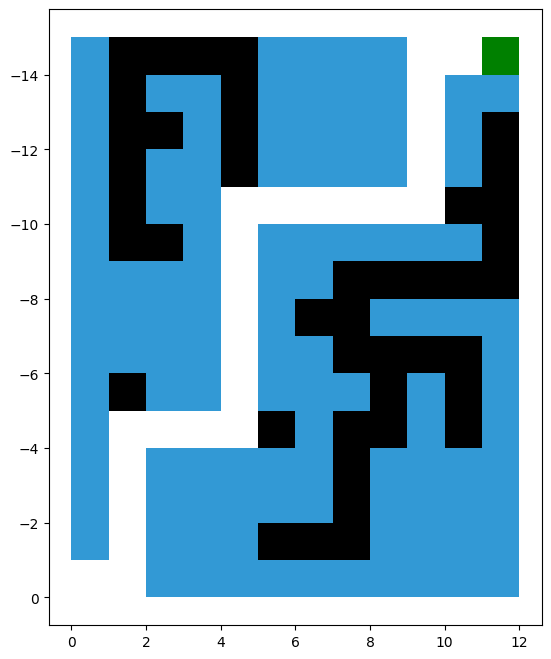

Training complete!
path: len.26 [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (11, 9), (12, 9), (13, 9), (14, 9), (14, 10), (14, 11)]


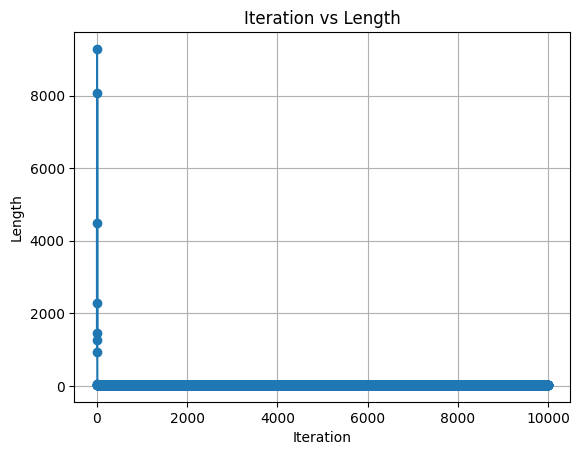

<Figure size 640x480 with 0 Axes>

In [21]:
import numpy as np
# Define the maze
maze = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1]
]
source = (2,8)
destination = (13,8)

# Define the maze
maze = np.array([
    [1, 1, 0, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 0, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 0]
])
source = (1,3)
destination = (5,3)
facing = "left"

maze = np.array([
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
    [1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0],
    [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
    [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0]
])
source = (0,0)
destination = (14,11)


# [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

# source = (0,0)
# destination = (49, 38)

def binary_to_decimal(binary):
    decimal = int(binary, 2)
    return decimal

def decimal_to_binary(decimal):
  """Converts a decimal number to its binary equivalent.

  Args:
      decimal: An integer representing the decimal number.

  Returns:
      A string representing the binary equivalent of the decimal number.
  """

  if decimal == 0:
    return "0"

  binary = ""
  while decimal > 0:
    remainder = decimal % 2
    binary = str(remainder) + binary
    decimal //= 2

  return binary


# Example usage:
binary_number = "101"
decimal_value = binary_to_decimal(binary_number)
print("Binary:", binary_number)
print("Decimal:", decimal_value)








def get_current_state(maze, current_location, facing):
    row, col = current_location
    # Calculate the next location based on the facing direction
    if facing == 'up':
        front_row, front_col = row - 1, col
        left_row, left_col = row, col - 1
        right_row, right_col = row, col + 1
        # Check if there is a path to the left
        left_value = 0 if left_col > 0 and maze[left_row][left_col] == 0 else 1
        # Check if there is a path to the right
        right_value = 0 if right_col < len(maze[0]) and maze[right_row][right_col] == 0 else 1
        # Check if there is a path to the front
        front_value = 0 if front_row > 0 and maze[front_row][front_col] == 0 else 1
        # Check if there is an obstacle in front
    elif facing == 'down':
        front_row, front_col = row + 1, col
        left_row, left_col = row, col + 1
        right_row, right_col = row, col - 1
        # Check if there is a path to the left
        left_value = 0 if left_col < len(maze[0]) and maze[left_row][left_col] == 0 else 1
        # Check if there is a path to the right
        right_value = 0 if right_col > 0 and maze[right_row][right_col] == 0 else 1
        # Check if there is a path to the front
        front_value = 0 if front_row < len(maze) and maze[front_row][front_col] == 0 else 1
    elif facing == 'left':
        front_row, front_col = row, col - 1
        left_row, left_col = row + 1, col
        right_row, right_col = row - 1, col
        # Check if there is a path to the left
        left_value = 0 if left_row < len(maze) and maze[left_row][left_col] == 0 else 1
        # Check if there is a path to the right
        right_value = 0 if right_row > 0 and maze[right_row][right_col] == 0 else 1
        # Check if there is a path to the front
        front_value = 0 if front_col > 0 and maze[front_row][front_col] == 0 else 1
    elif facing == 'right':
        front_row, front_col = row, col + 1
        left_row, left_col = row - 1, col
        right_row, right_col = row + 1, col
        # Check if there is a path to the left
        left_value = 0 if left_row >0 and maze[left_row][left_col] == 0 else 1
        # Check if there is a path to the right
        right_value = 0 if right_row <  len(maze) and maze[right_row][right_col] == 0 else 1
        # Check if there is a path to the front
        front_value = 0 if front_col <  len(maze[0]) and maze[front_row][front_col] == 0 else 1
    return (left_value, right_value, front_value), binary_to_decimal(str(left_value) + str(right_value) + str(front_value))

# Example usage:
# current_location = (2, 8)  # Example starting location
current_location = (1, 3)  # Example starting location
# facing_direction = 'up'    # Example starting facing direction
get_current_state(maze, current_location, facing='up') # output: [0, 1, 1]<binary>, 3 <decimal>
get_current_state(maze, current_location, facing='left') # output: [0, 1, 1]<binary>, 6 <decimal>
get_current_state(maze, current_location, facing='right') # output: [1, 1, 1]<binary>, 7 <decimal>
get_current_state(maze, current_location, facing='down') # output: [1, 0, 1] <binary> 5 <decimal>








def is_valid_coords(maze, coordinates):
    x, y = coordinates
    if (x>=0) and (x < len(maze)) and (y > 0) and (y < len(maze[0])) and maze[x][y]==0:
        return True
    else:
        return False

def move(maze, facing, action, current_coordinates, move_forward_on_turn=True):
    '''
      move_forward_on_turn=True makes it move forward towards direction of turn on every turn action.
    '''
    x, y = current_coordinates
    new_facing = facing
    new_coordinates = current_coordinates

    # Perform the chosen action
    if action == 0:
      action = "left"
    elif action == 1:
      action = "right"
    elif action == 2:
      action = "forward"
    elif action not in ["left", "right", "forward"]:
      raise ValueError(f"Amigo! action is not supposed to be \"{action}\". it is either of [left, right, forward]")  # Raises a ValueError

    if action == 'left':
        if facing == 'up':
            new_facing = 'left'
        elif facing == 'down':
            new_facing = 'right'
        elif facing == 'left':
            new_facing = 'down'
        elif facing == 'right':
            new_facing = 'up'
        # new_coordinates = current_coordinates
    elif action == 'right':
        if facing == 'up':
            new_facing = 'right'
        elif facing == 'down':
            new_facing = 'left'
        elif facing == 'left':
            new_facing = 'up'
        elif facing == 'right':
            new_facing = 'down'
        # new_coordinates = current_coordinates
    if move_forward_on_turn:
        facing = new_facing
    if action == "forward" or move_forward_on_turn:
        if facing == 'up':
            new_coordinates = (x - 1, y)
        elif facing == 'down':
            new_coordinates = (x + 1, y)
        elif facing == 'left':
            new_coordinates = (x, y - 1)
        elif facing == 'right':
            new_coordinates = (x, y + 1)
        if not is_valid_coords(maze, new_coordinates):
            new_coordinates = current_coordinates
        # new_facing = facing
    return new_coordinates, new_facing

# Example usage:
current_facing = 'up'      # Example current facing action
action = 'left'  # Example rotation action ('left' or 'right')

current_coordinates = (0, 0)  # Example starting coordinates
new_coordinates, new_facing = move(maze, current_facing, action, current_coordinates)

print("New Coordinates:", new_coordinates)
print("New Facing Direction:", new_facing)









from IPython.display import clear_output
def display(maze, source, destination, current_position, path=None):
    clear_output()
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if (i, j) == source:
                print('S', end=' ')
            elif (i, j) == destination:
                print('D', end=' ')
            elif (i, j) == current_position:
                print('C', end=' ')
            elif path and (i, j) in path:
                print('*', end=' ')  # Mark the path with '*'
            elif maze[i][j] == 1:
                print('#', end=' ')
            else:
                print('.', end=' ')
        print()



# Train q table

import numpy as np

# Define Q-learning parameters
num_actions = 4  # Up, Down, Left, Right
learning_rate = 0.05
discount_factor = 0.9
exploration_rate = 0.1
exploration_rate_decay = .90
num_episodes = 10000

# Define the number of states and actions
num_states = 2 ** 3  # 3 binary inputs
num_actions = 3      # left, right, forward
iteration_path_len_data = []


# Initialize Q-table with random values
q_values = np.zeros((num_states, num_actions))

for episode in range(num_episodes):
    # state = (0, 0)  # Starting position
    current_coordinates = source
    facing = "left" # For maze 2
    facing = "down" # For maze 3
    state_binary, state = get_current_state(maze, current_coordinates, facing)
    path = [current_coordinates]

    # while state != (maze.shape[0] - 1, maze.shape[1] - 1):  # Continue until reaching the goal
    while current_coordinates != destination:
        # Choose an action using epsilon-greedy strategy
        if np.random.rand() < exploration_rate:
            action = np.random.choice(num_actions)   # action is one of [0, 1, 2]
        else:
            action = np.argmax(q_values[state])      # action is one of [0, 1, 2]
        new_coordinates, new_facing = move(maze, facing, action, current_coordinates)
        new_state_binary, new_state = get_current_state(maze, new_coordinates, new_facing)


        # Update Q-value using the Bellman equation
        reward = -1 if maze[new_coordinates[0], new_coordinates[1]] == 0 else -5  # Penalize hitting a wall
        reward = +2 if new_coordinates == destination else reward # Reward for reaching destination
        q_values[state, action] += learning_rate * (
                reward + discount_factor * np.max(q_values[new_state]) - q_values[state, action])

        # Move to the new state
        facing = new_facing
        current_coordinates = new_coordinates
        state = new_state
        path.append(current_coordinates)
    iteration_path_len_data.append([episode, len(path)])

    # Decrease the exploration rate
    exploration_rate *= exploration_rate_decay
    if episode % 100 == 0:
        display(maze=maze, path=path, source = source, destination= (maze.shape[0] - 1, maze.shape[1] - 1), current_position=(maze.shape[0] - 1, maze.shape[1] - 1))
        print(f'{episode} path: len.{len(path)} {path}')

print("Training complete!")
# visualize_path(path)
display(maze=maze, path=path, source = source, destination= (maze.shape[0] - 1, maze.shape[1] - 1), current_position=(maze.shape[0] - 1, maze.shape[1] - 1))
print(f'path: len.{len(path)} {path}')


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output, display

def render_colab(maze, snake, food):
    maze_height = len(maze)
    maze_width = len(maze[0])
    # fig_width = 8 * maze_width / maze_height
    # fig, ax = plt.subplots(figsize=(fig_width, 8))
    # fig, ax = plt.subplots(figsize=(8, 8))
    rect_size = min(8 / maze_width, 8 / maze_height)
    fig, ax = plt.subplots(figsize=(maze_width * rect_size, maze_height * rect_size))

    # Plot the maze
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] == '1' or maze[i][j] == 1:
                ax.add_patch(patches.Rectangle((j, -i - 1), 1, 1, facecolor=(50/255, 153/255, 213/255)))
            # elif maze[i][j] == 'S':
            #     ax.add_patch(patches.Rectangle((j, -i - 1), 1, 1, facecolor='black'))  # snake_head
            # elif maze[i][j] == 'D':
            #     ax.add_patch(patches.Rectangle((j, -i - 1), 1, 1, facecolor='green')) # food
            elif maze[i][j] == '0' or maze[i][j] == 0:
                ax.add_patch(patches.Rectangle((j, -i - 1), 1, 1, facecolor='black')) # background

    # Plot the snake
    for segment in snake:
        ax.add_patch(patches.Rectangle((segment[1], -segment[0] - 1), 1, 1, facecolor='white')) # snake_body

    # Plot the food
    ax.add_patch(patches.Rectangle((food[1], -food[0] - 1), 1, 1, facecolor='green'))


    plt.axis('scaled')
    plt.gca().invert_yaxis()  # Invert y-axis to match the matrix coordinates

    # Clear the previous output and display the updated plot
    clear_output(wait=True)
    display(fig)
    plt.close(fig)
    plt.show()

import pygame
pygame.init()
pygame.font.init()

def render_pygame(maze, snake, food):
    # Each cell is represented by a square with a size of 20x20 pixels.
    # screen = pygame.display.set_mode((grid_size * 20, grid_size * 20))
    score=0
    maze_height = len(maze)
    maze_width = len(maze[0])
    screen = pygame.display.set_mode((maze_width * 20, maze_height * 20))
    pygame.display.set_caption('Maze Snake Game')
    black = (0, 0, 0)
    white = (255, 255, 255)
    green = (0, 255, 0)
    blue = (50, 153, 213)
    yellow = (255, 255, 0)
    screen.fill((0, 0, 0))

    # Draw the snake
    for segment in snake:
        pygame.draw.rect(screen, white, pygame.Rect(segment[1] * 20, segment[0] * 20, 20, 20))

    # Draw the maze
    for row in range(len(maze)):
        for column in range(len(maze[0])):
            if maze[row][column] == 1 or maze[row][column] == '1':
                pygame.draw.rect(screen, blue, pygame.Rect(column * 20, row * 20, 20, 20))
                '''
                    `column * 20`: x-coordinate of the top-left corner of the rectangle.
                                It's multiplied by 20 to convert from grid cell coordinates to pixel coordinates
                    `row * 20`: y-coordinate of the top-left corner of the rectangle.
                                multiplied by 20 to convert from grid cell coordinates to pixel coordinates.
                    `20`: The width of the rectangle (20 pixels).
                    `20`: The maze_height of the rectangle (20 pixels).
                '''

    # Draw the food
    pygame.draw.rect(screen, green, pygame.Rect(food[1] * 20, food[0] * 20, 20, 20))


    if score:
        # Display the semi-transparent Score on top-right corner
        font = pygame.font.Font('freesansbold.ttf', 32)
        score_text = "Your Score: " + str(score)

        # Create a semi-transparent text surface
        text_surface = font.render(score_text, True, yellow)
        text_surface.set_alpha(128)  # Adjust the alpha value for semi-transparency

        # Blit the semi-transparent text onto the screen
        screen.blit(text_surface, (maze_width - text_surface.get_width(), 0))

        # Display the message if provided
        if message:
            lines = message.split('\n')  # Split the message into lines
            y_position = width * 20 / 2 - (len(lines) - 1) * 20 / 2  # Calculate y-position for each line

            for line in lines:
                text_surface = font.render(line, True, yellow)
                text_rect = text_surface.get_rect(center=(maze_height * 20 / 2, y_position))
                screen.blit(text_surface, text_rect)
                y_position += 27  # Move to the next line (margin between lines)
    # Update the display
    pygame.display.flip()



current_coordinates = source
facing = "left" # For maze 2
facing = "down" # For maze 3
facing = "right"
state_binary, state = get_current_state(maze, current_coordinates, facing)
path = [current_coordinates]

# while state != (maze.shape[0] - 1, maze.shape[1] - 1):  # Continue until reaching the goal
while current_coordinates != destination:
    # Choose an action using epsilon-greedy strategy
    # if np.random.rand() < exploration_rate:
    #     action = np.random.choice(num_actions)
    # else:
    action = np.argmax(q_values[state])
    print(f'facing: {facing} state: {decimal_to_binary(state)} action: {action}')

    new_coordinates, new_facing = move(maze, facing, action, current_coordinates)
    new_state_binary, new_state = get_current_state(maze, new_coordinates, new_facing)
    print(f'new_coordinates:{new_coordinates} new_state_binary: {new_state_binary, new_state}, new_state:{new_state}, new_facing:{new_facing}')

    # Update Q-value using the Bellman equation
    # reward = -1 if maze[new_coordinates[0], new_coordinates[1]] == 0 else -5  # Penalize hitting a wall
    # reward = +5 if new_coordinates == destination else reward # Reward for reaching destination
    # q_values[state, action] += learning_rate * (
    #         reward + discount_factor * np.max(q_values[new_state]) - q_values[state, action])

    # Move to the new state
    facing = new_facing
    current_coordinates = new_coordinates
    state = new_state
    path.append(current_coordinates)
    # print(len(path))
    import sys, time
    if 'google.colab' in sys.modules:
        # display(maze=maze, path=path, source = source, destination= (maze.shape[0] - 1, maze.shape[1] - 1), current_position=(maze.shape[0] - 1, maze.shape[1] - 1))
        render_colab(maze, path, destination)
    else:
        print(f'path: {path}')
        # render_pygame(maze, path, destination)
        render_colab(maze, path, destination)
        pygame.quit()
    time.sleep(0.5)



# Decrease the exploration rate
exploration_rate *= exploration_rate_decay
if episode % 100 == 0:
    display(maze=maze, path=path, source = (0,0), destination= (maze.shape[0] - 1, maze.shape[1] - 1), current_position=(maze.shape[0] - 1, maze.shape[1] - 1))

print("Training complete!")
# visualize_path(path)
display(maze=maze, path=path, source = source, destination= (maze.shape[0] - 1, maze.shape[1] - 1), current_position=(maze.shape[0] - 1, maze.shape[1] - 1))
print(f'path: len.{len(path)} {path}')


import matplotlib.pyplot as plt

# Your data in the format: [ [iteration-1, length-1], [iteration-2, length-2], ... ]
# data = [[1, 10], [2, 15], [3, 20], [4, 25]]
data = iteration_path_len_data

# Extracting iterations and lengths into separate lists
iterations, lengths = zip(*data)

# Plotting the data
plt.plot(iterations, lengths, marker='o', linestyle='-')
plt.title('Iteration vs Length')
plt.xlabel('Iteration')
plt.ylabel('Length')
plt.grid(True)

# Display the plot
plt.show()

# Save the plot as a JPEG file
plt.savefig('iteration_vs_length_plot.jpg')



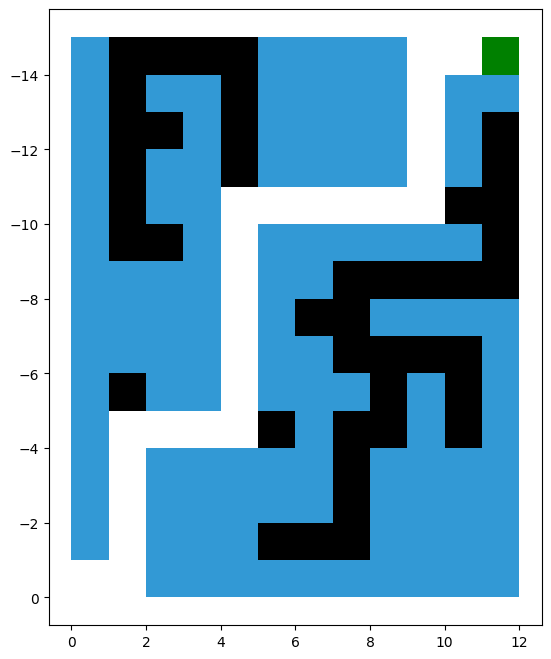

In [25]:

current_coordinates = source
facing = "left" # For maze 2
facing = "down" # For maze 3
facing = "right"
state_binary, state = get_current_state(maze, current_coordinates, facing)
path = [current_coordinates]

# while state != (maze.shape[0] - 1, maze.shape[1] - 1):  # Continue until reaching the goal
while current_coordinates != destination:
    # Choose an action using epsilon-greedy strategy
    # if np.random.rand() < exploration_rate:
    #     action = np.random.choice(num_actions)
    # else:
    action = np.argmax(q_values[state])
    print(f'facing: {facing} state: {decimal_to_binary(state)} action: {action}')

    new_coordinates, new_facing = move(maze, facing, action, current_coordinates)
    new_state_binary, new_state = get_current_state(maze, new_coordinates, new_facing)
    print(f'new_coordinates:{new_coordinates} new_state_binary: {new_state_binary, new_state}, new_state:{new_state}, new_facing:{new_facing}')

    # Update Q-value using the Bellman equation
    # reward = -1 if maze[new_coordinates[0], new_coordinates[1]] == 0 else -5  # Penalize hitting a wall
    # reward = +5 if new_coordinates == destination else reward # Reward for reaching destination
    # q_values[state, action] += learning_rate * (
    #         reward + discount_factor * np.max(q_values[new_state]) - q_values[state, action])

    # Move to the new state
    facing = new_facing
    current_coordinates = new_coordinates
    state = new_state
    path.append(current_coordinates)
    # print(len(path))
    import sys, time
    if 'google.colab' in sys.modules:
        # display(maze=maze, path=path, source = source, destination= (maze.shape[0] - 1, maze.shape[1] - 1), current_position=(maze.shape[0] - 1, maze.shape[1] - 1))
        render_colab(maze, path, destination)
    else:
        print(f'path: {path}')
        # render_pygame(maze, path, destination)
        render_colab(maze, path, destination)
        pygame.quit()
    time.sleep(0.2)